In [1]:
# db Ï†ëÏÜç 
# Ïö∞ÏÑ† db Ï†ëÏÜç ÌõÑ ÏõêÏãú Îç∞Ïù¥ÌÑ∞ Î∞õÍ∏∞
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import DB_PASS
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler

# PostgreSQL Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞ ÏÑ§Ï†ï
username = 'psh0826'  # ÏÇ¨Ïö©Ïûê Ïù¥Î¶Ñ
password = DB_PASS  # ÎπÑÎ∞ÄÎ≤àÌò∏
host = 'localhost'  # Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏÑúÎ≤Ñ Ï£ºÏÜå
port = '5432'  # Ìè¨Ìä∏ Î≤àÌò∏
dbname = 'youtube_videos'  # Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïù¥Î¶Ñ
connection_string = f"postgresql://{username}:{password}@{host}:{port}/{dbname}"

# Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞ ÏóîÏßÑ ÏÉùÏÑ±
engine = create_engine(connection_string)

# SQL ÏøºÎ¶¨ Ïã§Ìñâ Î∞è Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
query = "SELECT * FROM video_datas;"

# Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏Ïò¨ ÌÖåÏù¥Î∏îÎ™Ö
df = pd.read_sql(query, engine)

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
# info() ÏóêÏÑú ÏàòÏπòÌòï / Î¨∏ÏûêÏó¥ Îì±ÏùÑ Ï≤¥ÌÅ¨ÌïúÎã§.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2391 entries, 0 to 2390
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   video_id      2391 non-null   object        
 1   title         2391 non-null   object        
 2   time          2391 non-null   datetime64[ns]
 3   views         2391 non-null   int64         
 4   likes         2391 non-null   int64         
 5   dislikes      2391 non-null   int64         
 6   comments_cnt  2391 non-null   int64         
 7   comments      2391 non-null   object        
 8   query         2391 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 168.2+ KB
None


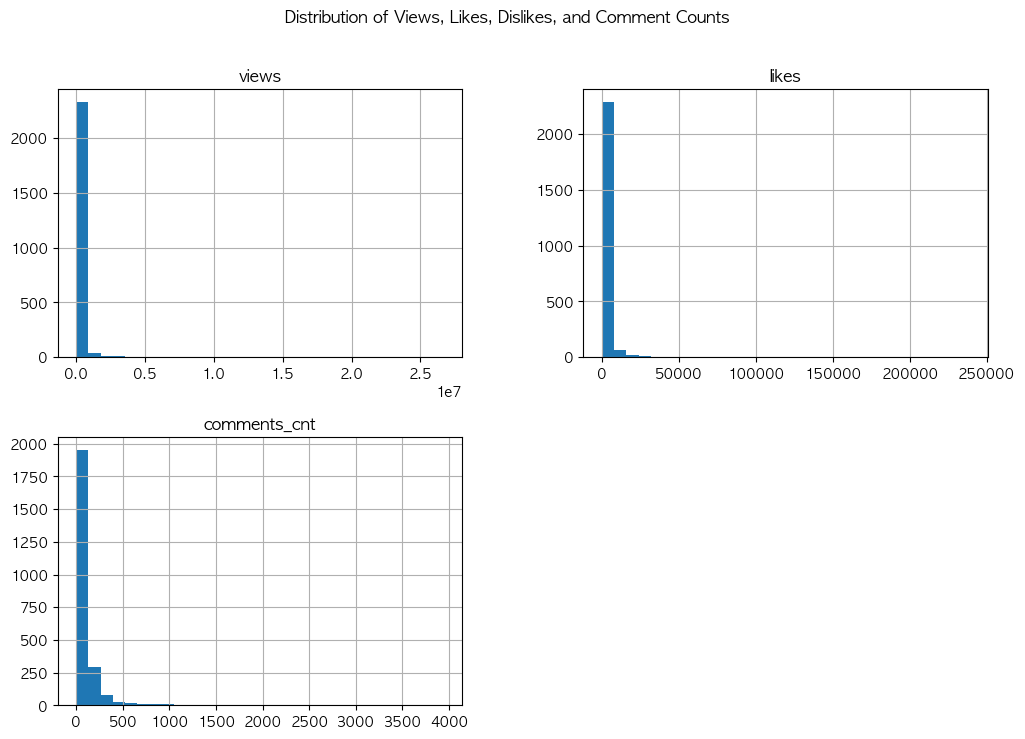

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ df ÏÉùÏÑ± (Í∞ÄÏÉÅÏùò Îç∞Ïù¥ÌÑ∞)
# df = pd.DataFrame( ... )

# Ï°∞ÌöåÏàò, Ï¢ãÏïÑÏöî, Ïã´Ïñ¥Ïöî, ÎåìÍ∏Ä ÏàòÏùò Î∂ÑÌè¨Î•º ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÏãúÍ∞ÅÌôî
df[['views', 'likes', 'comments_cnt']].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribution of Views, Likes, Dislikes, and Comment Counts')
plt.show()


In [2]:

# ÎÑêÍ∞í ÌôïÏù∏
df.isnull()

# ÎÑêÍ∞í Í∞úÏàò ÌôïÏù∏
df.isnull().sum()
print(df.isna().sum())

# isna Îäî ÏãúÎ¶¨Ïñº Í∞ùÏ≤¥ÏóêÎèÑ Ï†ÅÏö©Îê®.
df['video_id'].isna()
print(df['video_id'].isna().sum())


video_id        0
title           0
time            0
views           0
likes           0
dislikes        0
comments_cnt    0
comments        0
query           0
dtype: int64
0


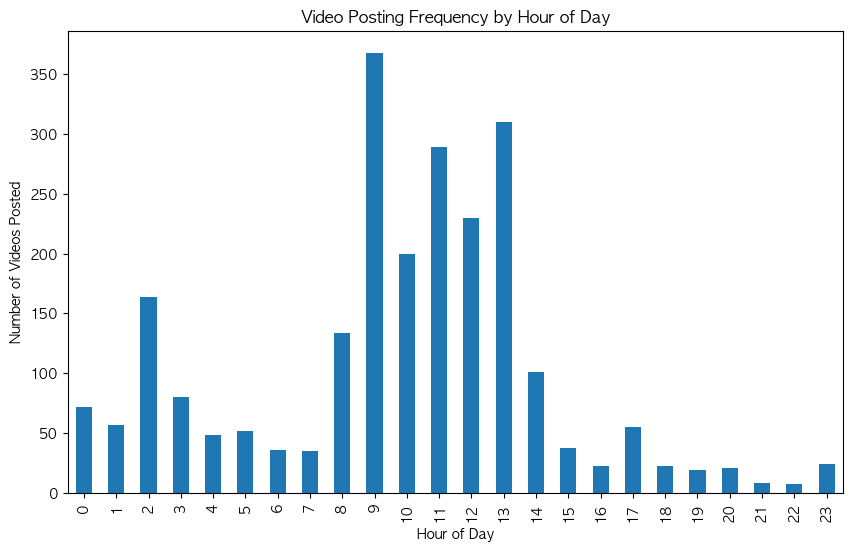

In [96]:
# 'time' Ïª¨ÎüºÏùÑ datetime Í∞ùÏ≤¥Î°ú Î≥ÄÌôò
df['time'] = pd.to_datetime(df['time'])

# ÎÇ†Ïßú Î∞è ÏãúÍ∞Ñ Ï∂îÏ∂ú
df['hour'] = df['time'].dt.hour

# ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏòÅÏÉÅ Í≤åÏãú ÎπàÎèÑ ÏãúÍ∞ÅÌôî
df['hour'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos Posted')
plt.title('Video Posting Frequency by Hour of Day')
plt.show()


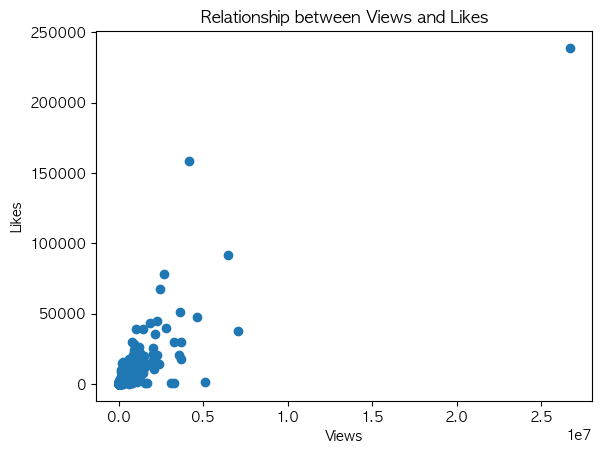

In [97]:
# ÏÇ∞Ï†êÎèÑÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ï¢ãÏïÑÏöîÏôÄ Ï°∞ÌöåÏàòÏùò Í¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî
plt.scatter(df['views'], df['likes'])
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Relationship between Views and Likes')
plt.show()


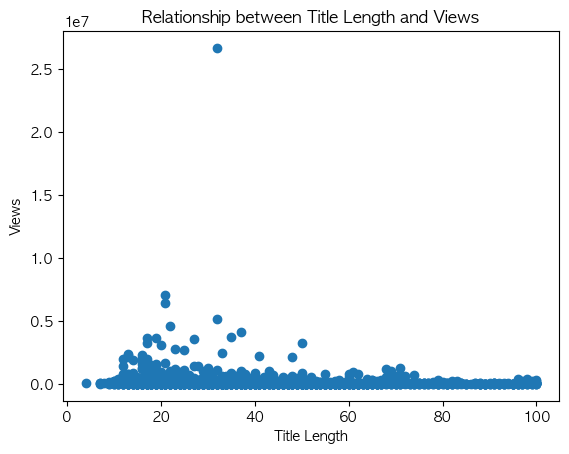

In [98]:
# ÏòÅÏÉÅ Ï†úÎ™© Í∏∏Ïù¥ Í≥ÑÏÇ∞
df['title_length'] = df['title'].apply(len)

# Ï†úÎ™© Í∏∏Ïù¥ÏôÄ Ï°∞ÌöåÏàòÏùò Í¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî
plt.scatter(df['title_length'], df['views'])
plt.xlabel('Title Length')
plt.ylabel('Views')
plt.title('Relationship between Title Length and Views')
plt.show()


<Figure size 1700x1200 with 0 Axes>

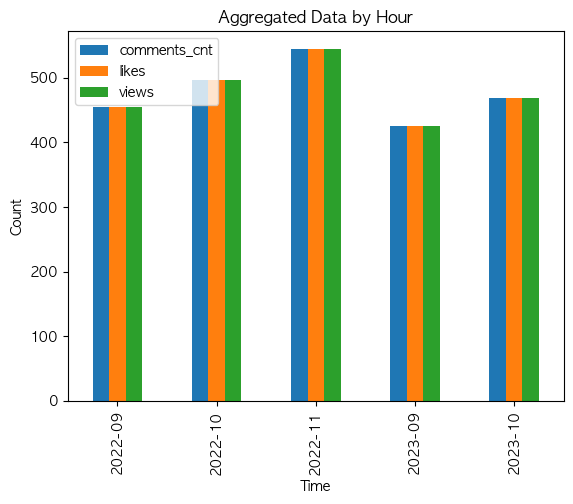

In [92]:
# ÏãúÍ∞ÑÎåÄÎ≥ÑÎ°ú 
# ÏãúÍ∞ÑÎåÄ(ÏãúÍ∞Ñ)ÍπåÏßÄ Ìè¨Ìï®ÌïòÏó¨ Ìè¨Îß∑ÌåÖ
df['time_formatted'] = df['time'].dt.strftime('%Y-%m')

# ÌäπÏ†ï Ïª¨ÎüºÎßå
df_temp = df[['time_formatted', 'comments_cnt', 'likes', 'views']]
# ÏãúÍ∞ÑÎåÄÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ
time_aggregated = df_temp.groupby('time_formatted').count()
import matplotlib.pyplot as plt

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(17,12))
time_aggregated.plot(kind='bar')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Aggregated Data by Hour')
plt.show()



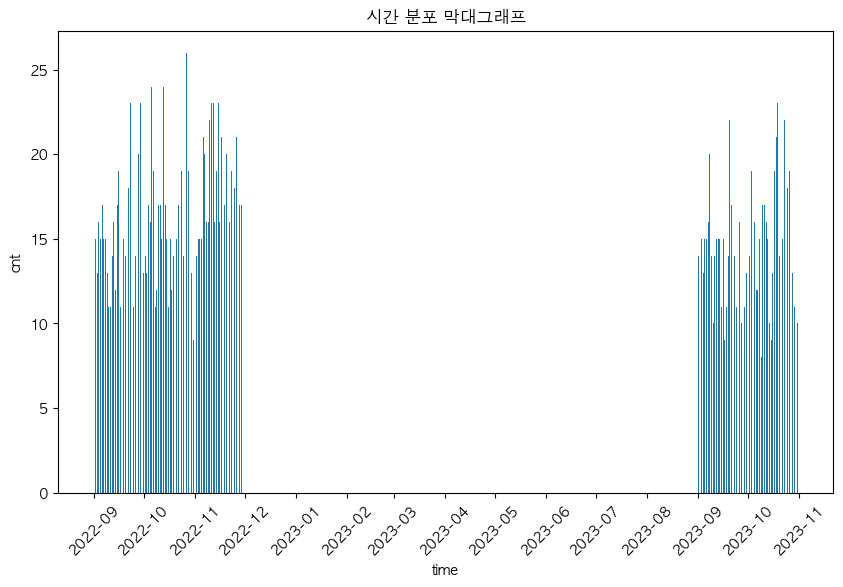

In [93]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'AppleGothic'

# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Ï°∞ÏÇ¨
df.describe()

# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Ï§ëÏóêÏÑú Ïù¥ÏÇ∞Ìòï Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïÑÎãàÍ±∞ÎÇò, Î≤îÏúÑÌòïÏù¥Í±∞ÎÇò, ÏßÄÍ∏à Ï≤òÎüº ÏãúÍ∞ÑÏù¥ÎÇò ÎÇ†Ïßú Í∞íÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥∏Îã§.
# time Ïª¨Îüº Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
# print(df['time'])

# Ï†ïÎ†¨
# df['time'].dtypes
# print(pd.to_datetime(df['time'])) # ÌïÑÏöîÌïòÎ©¥ ÎÇ†ÏßúÌÉÄÏûÖÏúºÎ°ú Î∞îÍæ∏Í≥†
# df['time'].sort_values()
# Ïù¥Í±∏Î°ú Ï†ïÎ†¨Ïù¥ ÏïàÎêòÎ©¥ Î∞ëÏóêÏÑú ÏãúÎ¶¨Ï¶àÎ°ú ÎΩëÏïÑÏÑú .sort_index()Î°ú Ï†ïÎ†¨Ìï¥ÎèÑ Îê®

# ÏãúÍ∞ÑÎåÄ ÏãúÍ∞ÅÌôî 

# ÎÇ†ÏßúÎ•º ÏãúÍ∞ÑÍπåÏßÄÎßå ÎÇòÏò§Í≤å ÌïòÍ∏∞
# ÎÇ†ÏßúÍπåÏßÄÎßå Î∂ÑÎ¶¨Ìï¥ÏÑú Î∂ÑÌè¨ Ï°∞ÏÇ¨
df['time_formatted'] = df['time'].dt.strftime('%Y-%m-%d')
# print(date_series)

# ÏãúÍ∞ÑÎåÄÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
time_series_cnt = df['time_formatted'].value_counts().sort_index()
# print(time_series_cnt)

# Ïù∏Îç±Ïä§(ÎÇ†Ïßú Î¨∏ÏûêÏó¥)Î•º datetimeÏúºÎ°ú Î≥ÄÌôò
# ÎÇ†ÏßúÌòïÌÉúÎ°ú Î∞îÍøîÏ§òÏïº Î∞ëÏóê xÏ∂ï ÎÇ†ÏßúÌòï Ìè¨Îß∑ÌÑ∞Í∞Ä ÏûëÎèôÌï®
time_series_cnt.index = pd.to_datetime(time_series_cnt.index)

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10,6))
plt.bar(time_series_cnt.index, time_series_cnt.values, width = 0.5)

# xÏ∂ï ÏÑ§Ï†ï (ÎßåÏïΩ ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ•º Îçî Îö±Îö±ÌïòÍ≤å Ìï†Î†§Î©¥ Ï£ºÎ≥ÑÎ°ú ÏßëÍ≥ÑÎ•º Îã§Ïãú ÌïòÍ±∞ÎÇò Ìï¥ÏÑú xÏ∂ïÏùò Î≤îÏúÑÎ•º Ìôï Ï§ÑÏó¨ÏïºÌï®)
plt.xticks(ticks=time_series_cnt.index, labels=time_series_cnt.index.strftime('%Y-%m'), rotation=45)

plt.xlabel('time')
plt.ylabel('cnt')
plt.title('ÏãúÍ∞Ñ Î∂ÑÌè¨ ÎßâÎåÄÍ∑∏ÎûòÌîÑ')

# xÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # ÏõîÎ≥ÑÎ°ú Î°úÏºÄÏù¥ÌÑ∞ ÏÑ§Ï†ï
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 'ÎÖÑ-Ïõî' ÌòïÏãùÏúºÎ°ú Ìè¨Îß§ÌÑ∞ ÏÑ§Ï†ï

plt.show()

In [ ]:
# ÏúÑ time Ïª¨ÎüºÏùò Î∂ÑÌè¨Î•º Î≥¥Î©¥, 22ÎÖÑ 9Ïõî Î∂ÄÌÑ∞ 11Ïõî, 23ÎÖÑ 9Ïõî Î∂ÄÌÑ∞ 10ÏõîÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞ÏûÑÏùÑ ÏïåÏàòÏûàÎã§.
# Ïù¥Îäî Ï≤òÏùåÎ∂ÄÌÑ∞ ÏàòÏßëÌï†Îïå Í∞ÄÏùÑ Ìå®ÏÖò Ìä∏ÎûúÎìúÎ•º ÏïåÏïÑÎ≥¥Í∏∞ ÏúÑÌï®Ïù¥ÏóàÎã§.

# ÏùºÎ≥ÑÎ°ú ÏàòÏßëÎêú ÎπÑÎîîÏò§ Í∞úÏàòÎ•º Î≥¥Î©¥, 
daily_counts = df['time'].dt.to_period('D').value_counts().sort_index()

# ÏùºÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
daily_avg = daily_counts.mean()
print('Ïùº ÌèâÍ∑† ÎπÑÎîîÏò§ Í∞úÏàò: ', daily_avg)

# ÏùºÎ≥Ñ ÎèôÏòÅÏÉÅÏùÄ ÌèâÍ∑† 15Í∞ú Ï†ïÎèÑ ÏûàÏóàÎã§. 




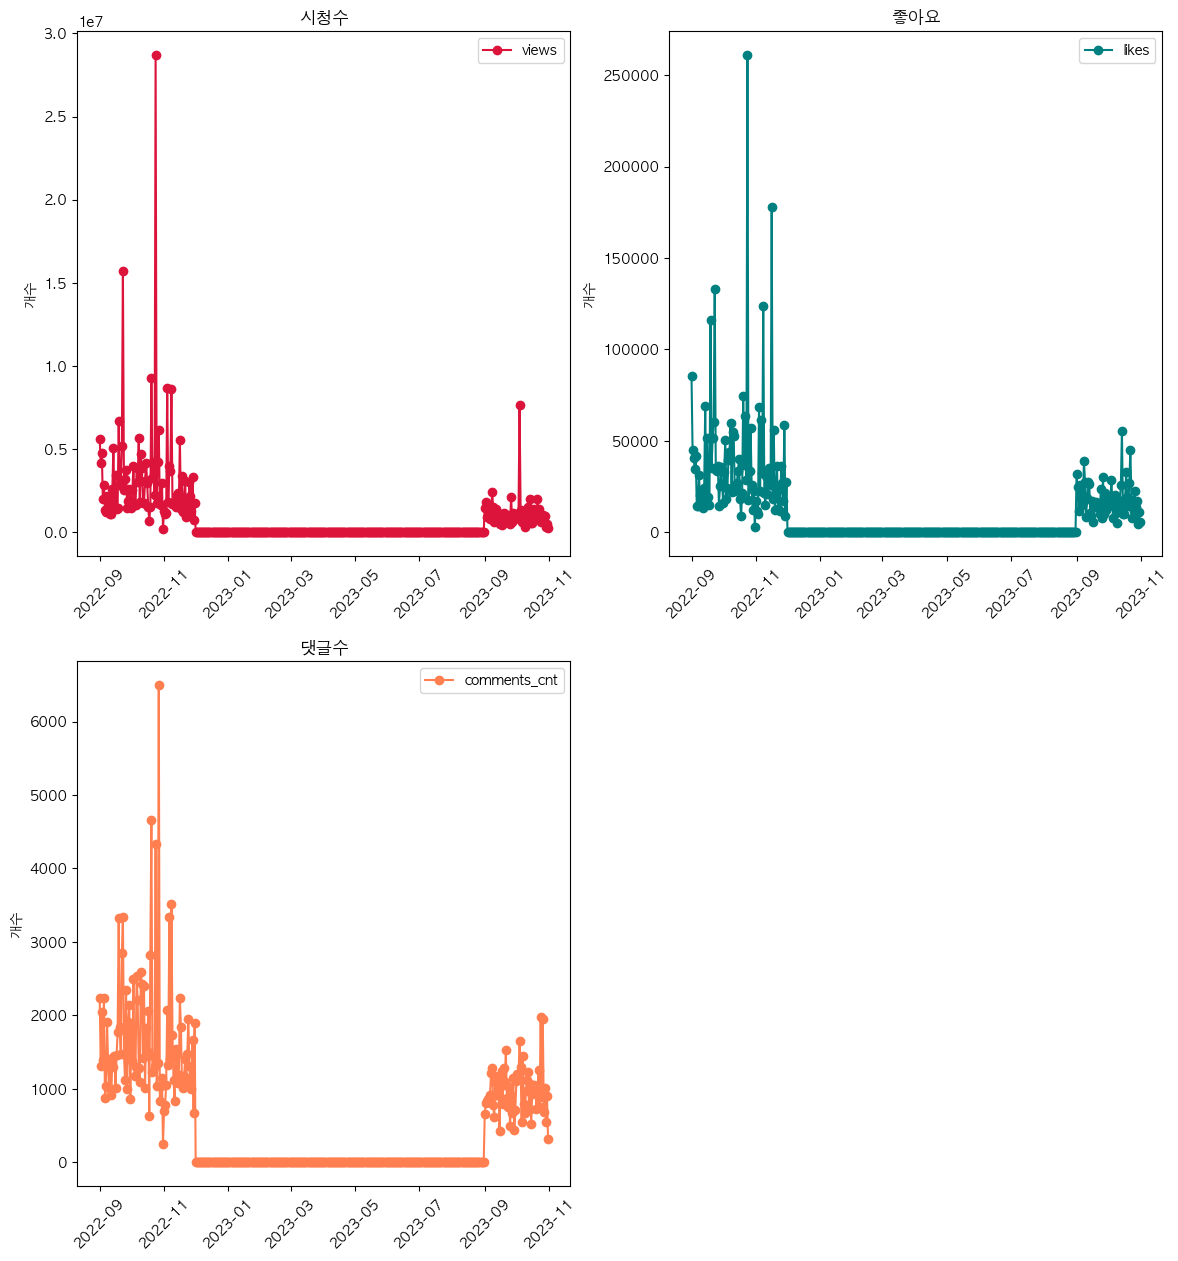

In [61]:
# Ïûê Îã§ÏùåÏùÄ time Ïª¨ÎüºÏóê Îî∞ÎùºÏÑú ÏãúÏ≤≠Ïàò, Ï¢ãÏïÑÏöî, ÎåìÍ∏ÄÏàòÍ∞Ä Ïñ¥ÎñªÍ≤å Î≥ÄÌôîÌïòÎäîÏßÄ Î∂ÑÏÑùÌï¥Î≥¥Ïûê
import matplotlib.dates as mdates

# ÏãúÍ∞ÑÎåÄ ÌôïÏù∏
df['time']

# ÏùºÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ Ïû¨Íµ¨ÏÑ± 
daily_data = df.resample('D', on='time').sum()
# sum() Ìï®ÏàòÎäî Ìï©ÏÇ∞ Ïó≠Ìï†ÏùÑ Ìï®. Ï¶â time Ïª¨ÎüºÏùÑ Ïù∏Îç±Ïä§Î°ú ÌïòÎäî ÏßëÍ≥Ñ dfÍ∞Ä ÏôÑÏÑ±Îê®
# Îî∞ÎùºÏÑú ['time'] ÏúºÎ°úÎäî Ïª¨ÎüºÏù¥ ÎçîÏù¥ÏÉÅ ÏïÑÎãàÎØÄÎ°ú Ï°∞ÌöåÎêòÏßÄ ÏïäÏùå.

plt.figure(figsize=(14, 15))
for i in range(1, 4):
   
    plt.subplot(2, 2, i)
    if i == 1: 
        y = 'views'
        color = 'Crimson'
        title = 'ÏãúÏ≤≠Ïàò'
    if i == 2: 
        y = 'likes'
        color = 'Teal'
        title = 'Ï¢ãÏïÑÏöî'
    if i == 3:
        y = 'comments_cnt'
        color = 'Coral'
        title = 'ÎåìÍ∏ÄÏàò'
    
    plt.plot(daily_data.index, daily_data[y], label=y, marker='o', color = color )
    
    plt.ylabel('Í∞úÏàò')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
  

    # ÎÇ†Ïßú ÌòïÏãù ÏßÄÏ†ï
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
plt.show()


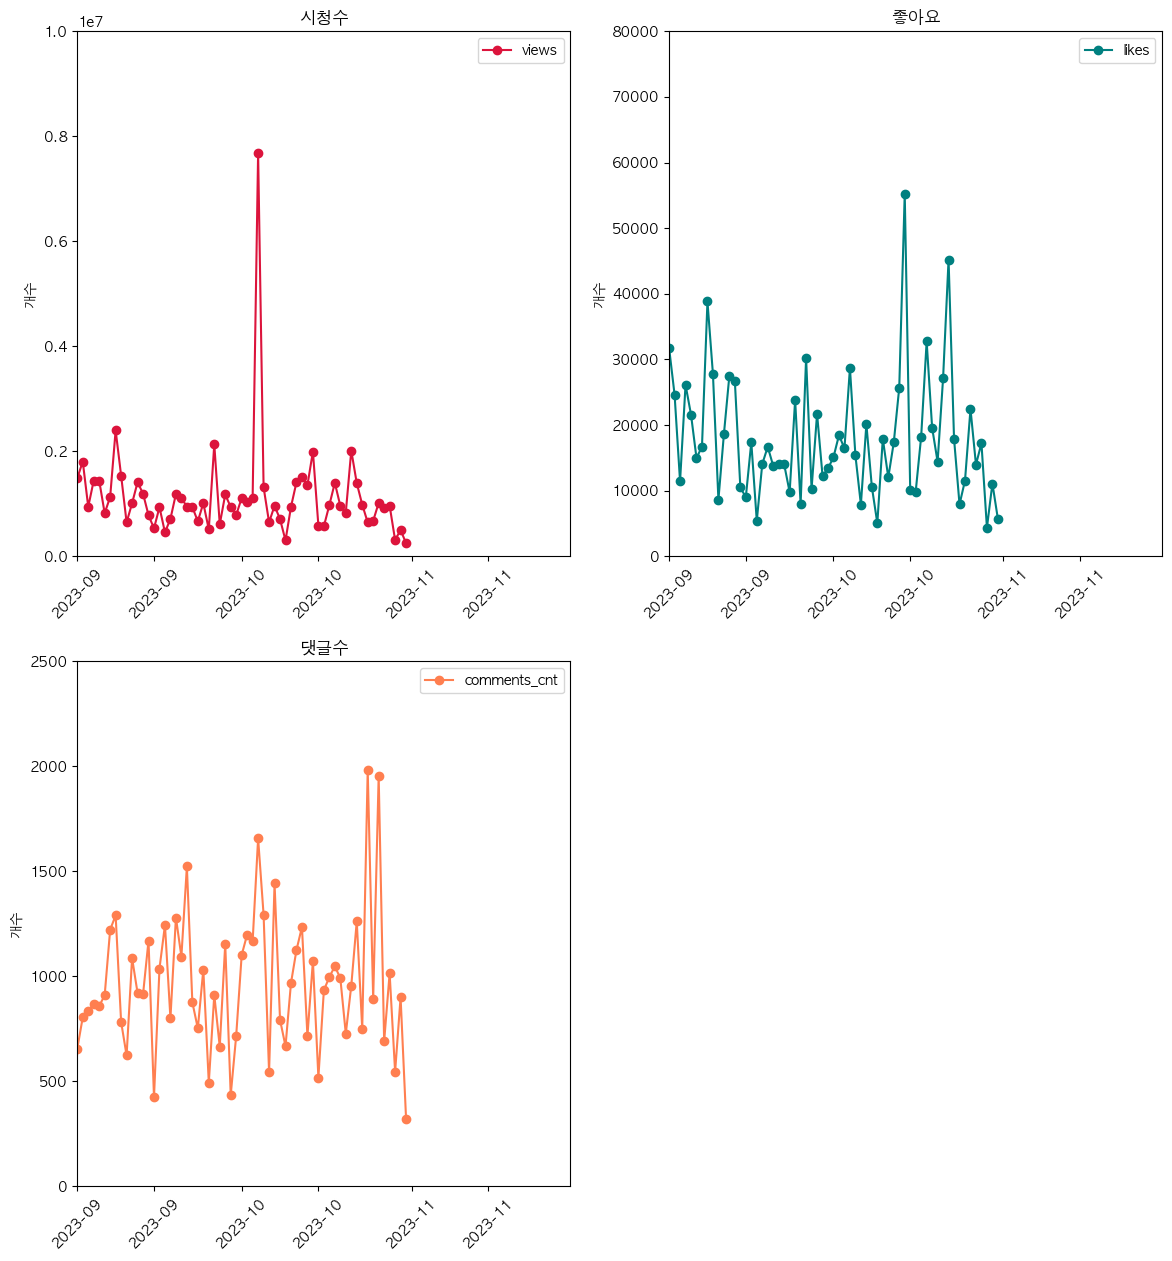

In [69]:
# Í∑∏ÎûòÌîÑÍ∞Ä ÎÑàÎ¨¥ ÏûëÏïÑÏÑú Ïûò ÏïàÎ≥¥Ïù∏Îã§. Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌïú Í∏∞Í∞ÑÎßå Îî∞Î°ú ÎΩëÏïÑÏÑú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎäî Î∂ÄÎ∂ÑÏùÄ Í∑∏ÎûòÌîÑÏóêÏÑú Ï†úÏô∏ÏãúÌÇ§Ïûê
# Ïûê Îã§ÏùåÏùÄ time Ïª¨ÎüºÏóê Îî∞ÎùºÏÑú ÏãúÏ≤≠Ïàò, Ï¢ãÏïÑÏöî, ÎåìÍ∏ÄÏàòÍ∞Ä Ïñ¥ÎñªÍ≤å Î≥ÄÌôîÌïòÎäîÏßÄ Î∂ÑÏÑùÌï¥Î≥¥Ïûê
import matplotlib.dates as mdates

# ÏùºÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ Ïû¨Íµ¨ÏÑ± 
daily_data = df.resample('D', on='time').sum()
# sum() Ìï®ÏàòÎäî Ìï©ÏÇ∞ Ïó≠Ìï†ÏùÑ Ìï®. Ï¶â time Ïª¨ÎüºÏùÑ Ïù∏Îç±Ïä§Î°ú ÌïòÎäî ÏßëÍ≥Ñ dfÍ∞Ä ÏôÑÏÑ±Îê®
# Îî∞ÎùºÏÑú ['time'] ÏúºÎ°úÎäî Ïª¨ÎüºÏù¥ ÎçîÏù¥ÏÉÅ ÏïÑÎãàÎØÄÎ°ú Ï°∞ÌöåÎêòÏßÄ ÏïäÏùå.

plt.figure(figsize=(14, 15))
for i in range(1, 4):
   
    plt.subplot(2, 2, i)
    if i == 1: 
        y = 'views'
        color = 'Crimson'
        title = 'ÏãúÏ≤≠Ïàò'
        ylim = (0, 10000000)
    if i == 2: 
        y = 'likes'
        color = 'Teal'
        title = 'Ï¢ãÏïÑÏöî'
        ylim = (0, 80000)
    if i == 3:
        y = 'comments_cnt'
        color = 'Coral'
        title = 'ÎåìÍ∏ÄÏàò'
        ylim = (0, 2500)
    plt.plot(daily_data.index, daily_data[y], label=y, marker='o', color = color )
    
    plt.ylabel('Í∞úÏàò')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
  
    # ÎÇ†Ïßú ÌòïÏãù ÏßÄÏ†ï
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    start_date = pd.to_datetime("2023-09-01")
    end_date = pd.to_datetime("2023-11-30")
    
    plt.ylim(*ylim)
    plt.xlim(start_date, end_date)

plt.show()





                  time  comments_cnt     views     likes
time          1.000000     -0.107926 -0.087080 -0.074942
comments_cnt -0.107926      1.000000  0.543790  0.519951
views        -0.087080      0.543790  1.000000  0.859971
likes        -0.074942      0.519951  0.859971  1.000000


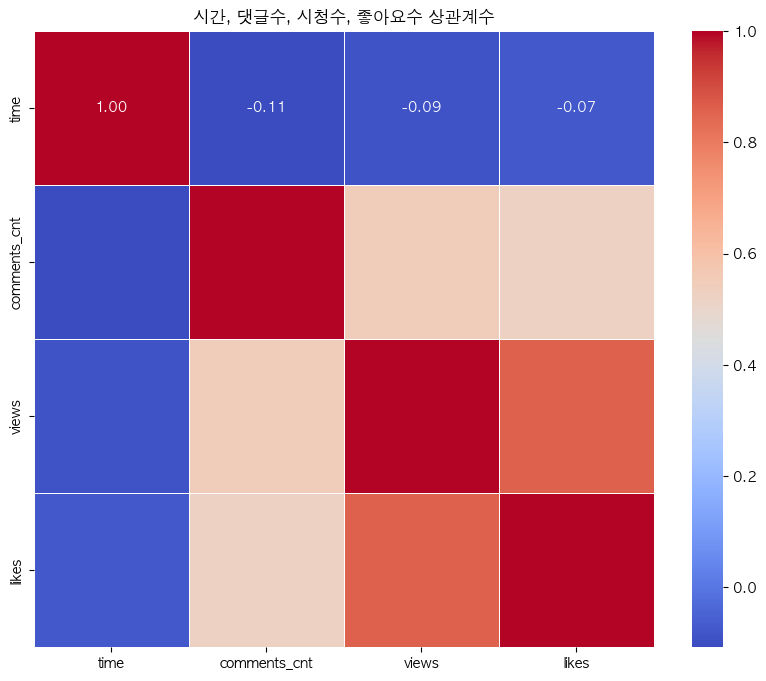

In [74]:

# ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ°ú ÏïåÏïÑÎ≥¥Ïûê 
correlation_matrix = df[['time', 'comments_cnt', 'views','likes']].corr()
print(correlation_matrix)

# seaborn ÏúºÎ°ú ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôîÌïòÍ∏∞
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# ÌÉÄÏù¥ÌãÄ Î∞è ÎùºÎ≤® ÏÑ§Ï†ï
plt.title('ÏãúÍ∞Ñ, ÎåìÍ∏ÄÏàò, ÏãúÏ≤≠Ïàò, Ï¢ãÏïÑÏöîÏàò ÏÉÅÍ¥ÄÍ≥ÑÏàò')
plt.show()





In [ ]:
# ÏúÑ ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Î≥¥Î©¥
'''
    1. Ï¢ãÏïÑÏöîÏôÄ ÏãúÏ≤≠ÏàòÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÎã§. 0.85
    2. Ï¢ãÏïÑÏöî/ÎåìÍ∏ÄÏàòÎäî Ï∞∏Ïó¨ÎèÑÏù¥Îã§.  ÏãúÏ≤≠ÏûêÏàòÎäî Ïù∏Í∏∞ÎèÑ... 
    
'''

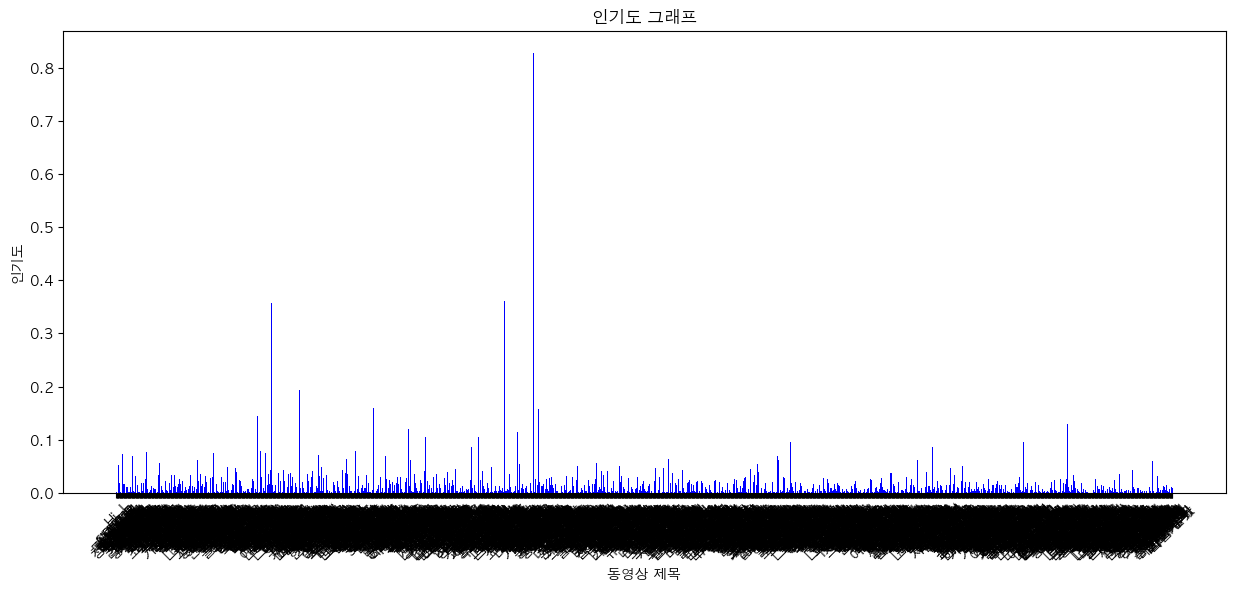

In [77]:
# Í∞ÄÏû• Ïù∏Í∏∞ ÎßéÏùÄ ÎèôÏòÅÏÉÅ ÏïåÏïÑÎ≥¥Í∏∞
# Ï∞∏Ïó¨ÎèÑÍ∞Ä ÎÜíÏïÑÏïº ÌïòÎØÄÎ°ú ÏãúÏ≤≠ÏûêÏàòÎ•º Ï†úÏô∏ÌïòÍ≥† ÎåìÍ∏ÄÏàòÏôÄ Ï¢ãÏïÑÏöîÏàòÏπòÎßå Î≥∏Îã§.


# Ï¢ãÏïÑÏöîÏôÄ ÎåìÍ∏ÄÏàò Ï†ïÍ∑úÌôî
scaler = MinMaxScaler()
df['likes_normalized'] = scaler.fit_transform(df[['likes']])
df['comments_cnt_normalized'] = scaler.fit_transform(df[['comments_cnt']])


# Ïù∏Í∏∞ÎèÑ Í≥ÑÏÇ∞ (Ï†ïÍ∑úÌôîÎêú Ï¢ãÏïÑÏöîÏôÄ ÎåìÍ∏ÄÏàòÏùò ÌèâÍ∑†)
df['popularity'] = df[['likes_normalized', 'comments_cnt_normalized']].mean(axis=1)

# Ï†úÎ™©Í∏∏Ïù¥ Ï°∞Ï†ï
titles = df['title'].str[0:5]

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(15, 6))
plt.bar(titles, df['popularity'], color='blue')
plt.xlabel('ÎèôÏòÅÏÉÅ Ï†úÎ™©')
plt.ylabel('Ïù∏Í∏∞ÎèÑ')
plt.title('Ïù∏Í∏∞ÎèÑ Í∑∏ÎûòÌîÑ')
plt.xticks(rotation=45)

# Í≤ΩÍ≥†Î©îÏãúÏßÄ Í∞ÄÎ¶¨Í∏∞ 
import warnings
warnings.filterwarnings('ignore')

plt.show()

In [78]:
# Ïù∏Í∏∞ÎèÑ top 20 Ï°∞ÏÇ¨
# Ïù∏Í∏∞ÎèÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï†ïÎ†¨
top_videos = df.sort_values(by='popularity', ascending=False, ).head(20)

# ÏÉÅÏúÑ 100Í∞ú ÎèôÏòÅÏÉÅÏùò ÌÉÄÏù¥ÌãÄ Ï∂îÏ∂ú
top_titles = top_videos['title']

# Í≤∞Í≥º Ï∂úÎ†•
print(top_titles)

868                      Î™∏Ïóê Ïä§ÌîÑÎ†àÏù¥Î•º ÎøåÎ¶¨Ïûê 10Î∂Ñ ÎßåÏóê ÏôÑÏÑ±Îêú ÎìúÎ†àÏä§Í∞Ä ÏûàÎã§?
932                           ÏßÑÏßú Î∂ÄÏûêÎì§Ïù¥ Î°§Î†âÏä§ Í±∞Î•¥Îäî Ïù¥Ïú† (ft.Î©îÏ¢ÖÏ≤†)
1238                üòáÏàòÎä•Ïù¥ ·ÑÅ·Ö≥·áÄÎÇòÍ≥† ÎÇú Îí§ ·ÑÄ·Ö©3·ÑÉ·Ö≥·ÜØ·Ñã·Ö¥ ·ÑÜ·Ö©·Ñâ·Ö≥·Ü∏„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã
1084                                ÏßÄÍ∏à ÏÇ¨Í∏∞Ïóî ÏïÑÍπù vs ÏßÄÍ∏à ÏÇ¨ÎèÑ Í¥úÏ∏ä
803                                 Í∏àÏàòÏ†Ä Ïó∞ÎåÄÏÉù Î©îÏ¢ÖÏ≤†Ïùò Ï≤úÎßåÏõêÏßúÎ¶¨ Ï∞©Ïû•
290                     Îâ¥ÏßÑÏä§ ÌïòÏûÖÎ≥¥Ïù¥ Ïª§Î≤Ñ Ï£ºÏö∞Ïû¨ ÏÜîÎ°ú Î≤ÑÏ†Ñ ÏÑ∏Î°úÏ∫† #shorts
779     ENG) [Î∞∞Î∞∞ÏûêÎß§] Íµ¨ÎèÖÏûê Ïù¥Î≤§Ìä∏ | Ïò¨ Í∞ÄÏùÑ Í≤®Ïö∏ ÏΩîÎîî Ï§ÄÎπÑ ÏôÑÎ£åüçÇ‚ùÑÔ∏è ÍµêÎ≥µÌÖú ...
2280                    Íµ∂Ï£ºÎ¶∞ ÏÉÅÌÉúÎ°ú Î®πÎäî ÏπòÌÇ®Í≥º Í≥†Î¥âÎ∞•.. Ïù¥Í±¥ ÎèÑÏ†ÄÌûà Î™ªÏ∞∏ÏäµÎãàÎã§
349                             Í∞úÎπ°Ï≥êÏÑú Ï¥àÎä•Î†•Ïì∞Í≤å Îêú Ïö∞Ï£ºÌïòÎßà #Shorts
641     SUB) Îâ¥ÏßÑÏä§ ÎØºÏßÄ? Ïó¨ÏûêÏïÑÏù¥Îèå Ï°¥Ïòà Î©§Î≤Ñ Ïª§Î≤ÑÎ£© ÏÜåÍ∞úÌåÖ (Îâ¥ÏßÑÏä§, ÏïÑÏù¥Î∏å, Î•¥Ï

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(-20.0, 0, '‚àí20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

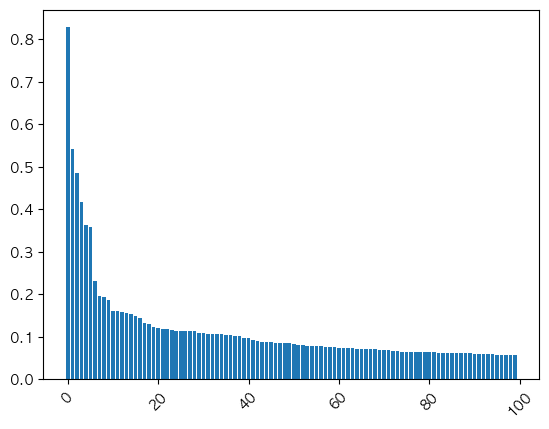

In [79]:

# Îã§Ïãú top 100Í∞ú Íµ¨ÌïòÍ∏∞
top_videos = df.nlargest(100, 'popularity')

#  nlargest Ìï®ÏàòÎäî ÏõêÎûòÏùò Ïù∏Îç±Ïä§Î•º Ïú†ÏßÄÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Î†áÍ≤å ÌïòÎ©¥ 100Í∞úÎ°ú Ï†ïÎ†¨Ìïú ÏùòÎØ∏Í∞Ä ÏóÜÏñ¥ÏßÑÎã§.
# titles_index = top_videos['title'].index


# x_pos ÏÉàÎ°ú Ïù∏Îç±Ïä§ ÎßåÎì§Ïñ¥ÏÑú Ï£ºÍ∏∞
# Ïñ¥Ï∞®Ìîº 100Í∞ú ÎãàÍπê Í∑∏ÎÉ• Ïù¥Î†áÍ≤å Ìï¥ÎèÑ ÎêúÎã§.
x_pos = range(100)

# Îã§Ïãú ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
plt.bar(x_pos, top_videos['popularity'])
plt.xticks(rotation=45)

Text(0, 0.5, 'Ïù∏Í∏∞ÎèÑ')

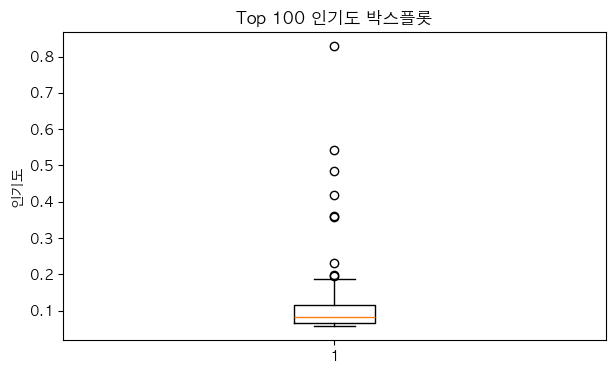

In [80]:
# Î∞ïÏä§ ÌîåÎ°ØÏúºÎ°ú Î∂ÑÌè¨ÎèÑ Ï°∞ÏÇ¨
plt.figure(figsize=(7,4))
plt.boxplot(top_videos['popularity'])
plt.title('Top 100 Ïù∏Í∏∞ÎèÑ Î∞ïÏä§ÌîåÎ°Ø')
plt.ylabel('Ïù∏Í∏∞ÎèÑ')


In [81]:
# Î∞ïÏä§ ÌîåÎ°ØÏùò ÏàòÏóºÏùÑ (1Î∂ÑÏúÑÏàò, 3Î∂ÑÏúÑÏàò) Î≤óÏñ¥ÎÇú Ïù∏Í∏∞ÎèÑÎäî Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£ºÌïòÍ≥† Ï†úÍ±∞
Q1 = top_videos['popularity'].quantile(0.25)
Q3 = top_videos['popularity'].quantile(0.75)
IQR = Q3 - Q1

# ÏàòÏóº Î≤îÏúÑ
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# ÏàòÏóº Î≤îÏúÑ ÏïàÏóê ÏûàÎäî Ïù∏Í∏∞ÎèÑÎ°ú ÌïÑÌÑ∞ÎßÅ
filtered_videos = top_videos[(top_videos['popularity'] >= lower_bound) & (top_videos['popularity'] <= upper_bound)]

print(filtered_videos)


         video_id                                              title  \
641   CeVzbZBE-OA  SUB) Îâ¥ÏßÑÏä§ ÎØºÏßÄ? Ïó¨ÏûêÏïÑÏù¥Îèå Ï°¥Ïòà Î©§Î≤Ñ Ïª§Î≤ÑÎ£© ÏÜåÍ∞úÌåÖ (Îâ¥ÏßÑÏä§, ÏïÑÏù¥Î∏å, Î•¥ÏÑ∏...   
508   WxnDoSY0sU8                     Îãò Ïò∑ÏùÑ Ïôú Í∑∏Î†áÍ≤å ÏûÖÏñ¥Ïöî?;; Ï°¥ÎÇò Í≥ºÌï®;;; „Ö†„Ö†„Ö†   
1040  -NyOgI1zGI8   NEW ÏµúÏï†Ïø†ÌÇ§ Îì±Í∑π.. Î®πÏñ¥Î≥∏ ÏÇ¨ÎûåÎì§ Îã§ Í∞êÎèôÌïú Ìó§Ïù¥Ï¶êÎÑõÍ∞ÄÎÇòÏäàÏÉåÎìúÏø†ÌÇ§ with ÏúÑÏ¶àÏõ∞   
1029  h9tZ6i2QLbQ                70kgÏùò Ïä§ÌÇ§Îãà vs ÏôÄÏù¥Îìú Î≠êÍ∞Ä Îçî ÎÇ†Ïî¨Ìï†Íπå? #shorts   
214   DU4DQDDxnKA                                  ÏÖîÏ∏† ÏÜåÎß§ ÏòàÏÅòÍ≤å Ï†ëÎäî Î∞©Î≤ï‚òùÔ∏è   
...           ...                                                ...   
775   F9P37-iWphA             Í≤®Ïö∏Ïò∑ ÏÇ¨Í∏∞Ï†ÑÏóê Î≥¥Ïûê! Í≤®Ïö∏ Í∞ÄÏû• Î®ºÏ†Ä ÏÇ¨ÏïºÌïòÎäî Ïò∑Îì§ [Ìå®ÏÖòÏö∞ÏÑ†ÏàúÏúÑ]   
43    pIf71qplZQc         Í∞ÄÏùÑÏóê Ïù¥ "4Í∞ÄÏßÄ"Îßå ÏûàÏúºÎ©¥ Ïò∑ Í±±Ï†ï ÎÅù!üçÇÍ∞ÄÏùÑ ÌïÑÏàò Ïä§ÌÉÄÏùº [ÌîÑÎ°†Ìä∏Î°úÏö∞]   
453   E4cYocTQtWA             ÎÇ®ÏûêÎùº

In [10]:
# Ïù¥Ï†ú Ïù¥ÏÉÅÎ≤îÏúÑ ÏïàÏóê ÏûàÎäî ÏòÅÏÉÅÎì§Îßå Í∞ÄÏßÄÍ≥† Ïôú Ïù¥ ÏòÅÏÉÅÎì§Ïù¥ Ïù∏Í∏∞Í∞Ä ÎßéÏïòÎäîÏßÄ Ï†úÎ™©ÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Ïûê
'''
ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ Ïù¥ÎØÄÎ°ú, Îã§ÏùåÏùò Í≥ºÏ†ïÎåÄÎ°ú ÏßÑÌñâÌïúÎã§.
1. Ï†úÎ™©Îì§ Ï†ÑÏ≤òÎ¶¨ ( ÌïúÍ∏ÄÎßå ÎÇ®Í∏∞Í≥† Îã§ Ï†úÏô∏, Í≥µÎ∞±ÎèÑ ÎùÑÏñ¥Ïì∞Í∏∞ ÌïúÏπ∏Îßå ÌóàÏö©)
2. ÌÜ†ÌÅ∞Ìôî mecab()ÏùÑ Ïù¥Ïö©Ìï¥ÏÑú ÌïúÍ∏ÄÏñ¥ ÌòïÌÉúÏÜåÎ≥ÑÎ°ú ÌÜ†ÌÅ∞ÌôîÎ•º ÌïúÎã§. 
3. Î∂àÏö©Ïñ¥ ÏÑ§Ï†ï (Ï†úÎ™©Îì§ÏùÑ Ï¢Ä Î≥¥Í≥† Ï°∞Í∏àÏî© Ï∂îÍ∞Ä Î∞è Î∞òÎ≥µÌïúÎã§.)
4. ÌÇ§ÏõåÎìú Î∂ÑÏÑù (Ï†úÎ™©ÏóêÏÑú ÏûêÏ£º Îì±Ïû•ÌïòÎäî Ï§ëÏöî Îã®Ïñ¥Î•º Ï∞æÎäîÎã§. Îã®Ïñ¥Ïùò ÎπàÎèÑÏàò, tf-idf)
5. 4Î≤àÏùÑ ÌÜ†ÎåÄÎ°ú, ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ°ú ÏãúÍ∞ÅÌôî ÌïúÎã§. 
'''

'\nÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ Ïù¥ÎØÄÎ°ú, Îã§ÏùåÏùò Í≥ºÏ†ïÎåÄÎ°ú ÏßÑÌñâÌïúÎã§.\n1. Ï†úÎ™©Îì§ Ï†ÑÏ≤òÎ¶¨ ( ÌïúÍ∏ÄÎßå ÎÇ®Í∏∞Í≥† Îã§ Ï†úÏô∏, Í≥µÎ∞±ÎèÑ ÎùÑÏñ¥Ïì∞Í∏∞ ÌïúÏπ∏Îßå ÌóàÏö©)\n2. ÌÜ†ÌÅ∞Ìôî mecab()ÏùÑ Ïù¥Ïö©Ìï¥ÏÑú ÌïúÍ∏ÄÏñ¥ ÌòïÌÉúÏÜåÎ≥ÑÎ°ú ÌÜ†ÌÅ∞ÌôîÎ•º ÌïúÎã§. \n3. Î∂àÏö©Ïñ¥ ÏÑ§Ï†ï (Ï†úÎ™©Îì§ÏùÑ Ï¢Ä Î≥¥Í≥† Ï°∞Í∏àÏî© Ï∂îÍ∞Ä Î∞è Î∞òÎ≥µÌïúÎã§.)\n4. ÌÇ§ÏõåÎìú Î∂ÑÏÑù (Ï†úÎ™©ÏóêÏÑú ÏûêÏ£º Îì±Ïû•ÌïòÎäî Ï§ëÏöî Îã®Ïñ¥Î•º Ï∞æÎäîÎã§. Îã®Ïñ¥Ïùò ÎπàÎèÑÏàò, tf-idf)\n5. 4Î≤àÏùÑ ÌÜ†ÎåÄÎ°ú, ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ°ú ÏãúÍ∞ÅÌôî ÌïúÎã§. \n'

In [11]:
# ÌïúÍµ≠Ïñ¥ ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ mecab ÏÑ§ÏπòÌïòÍ∏∞
'''
curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash
pip install python-mecab-ko
'''
from mecab import MeCab

In [12]:
# 1. Ï†úÎ™© Ï†ÑÏ≤òÎ¶¨
import re

def clean_text(text):
    text = re.sub("[^Í∞Ä-Ìû£0-9]", " ", text)
    text = re.sub("\s+", " ", text)
    text.strip()

    return text

filtered_videos['cleand_title'] = filtered_videos['title'].apply(clean_text)
filtered_videos['cleand_title']


641      Îâ¥ÏßÑÏä§ ÎØºÏßÄ Ïó¨ÏûêÏïÑÏù¥Îèå Ï°¥Ïòà Î©§Î≤Ñ Ïª§Î≤ÑÎ£© ÏÜåÍ∞úÌåÖ Îâ¥ÏßÑÏä§ ÏïÑÏù¥Î∏å Î•¥ÏÑ∏ÎùºÌïå ÏóêÏä§Ìåå ÎãÆ...
508                                 Îãò Ïò∑ÏùÑ Ïôú Í∑∏Î†áÍ≤å ÏûÖÏñ¥Ïöî Ï°¥ÎÇò Í≥ºÌï® 
1040                ÏµúÏï†Ïø†ÌÇ§ Îì±Í∑π Î®πÏñ¥Î≥∏ ÏÇ¨ÎûåÎì§ Îã§ Í∞êÎèôÌïú Ìó§Ïù¥Ï¶êÎÑõÍ∞ÄÎÇòÏäàÏÉåÎìúÏø†ÌÇ§ ÏúÑÏ¶àÏõ∞
1029                              70 Ïùò Ïä§ÌÇ§Îãà ÏôÄÏù¥Îìú Î≠êÍ∞Ä Îçî ÎÇ†Ïî¨Ìï†Íπå 
214                                      ÏÖîÏ∏† ÏÜåÎß§ ÏòàÏÅòÍ≤å Ï†ëÎäî Î∞©Î≤ï 
                              ...                        
775                  Í≤®Ïö∏Ïò∑ ÏÇ¨Í∏∞Ï†ÑÏóê Î≥¥Ïûê Í≤®Ïö∏ Í∞ÄÏû• Î®ºÏ†Ä ÏÇ¨ÏïºÌïòÎäî Ïò∑Îì§ Ìå®ÏÖòÏö∞ÏÑ†ÏàúÏúÑ 
43                Í∞ÄÏùÑÏóê Ïù¥ 4Í∞ÄÏßÄ Îßå ÏûàÏúºÎ©¥ Ïò∑ Í±±Ï†ï ÎÅù Í∞ÄÏùÑ ÌïÑÏàò Ïä§ÌÉÄÏùº ÌîÑÎ°†Ìä∏Î°úÏö∞ 
453                     ÎÇ®ÏûêÎùºÎ©¥ ÌïòÎÇòÏØ§ ÏûàÏñ¥ÏïºÌï† Ïó≠ÎåÄÍ∏â ÎãàÌä∏ ÎΩëÏïòÎã§ ÏΩúÎùºÎ≥¥Ïôï 11 
165                    Ï†ú2Ïùò Ï†ÑÏÑ±Í∏∞ ÌïúÎèôÏïà Ï£ºÏ∂§ÌñàÎã§Í∞Ä ÏµúÍ∑º Îã§Ïãú Îñ°ÏÉÅÌïú Ìå®ÏÖò ÏïÑÏù¥ÌÖú
714         

In [13]:
# 2. ÌÜ†ÌÅ∞Ìôî
mecab = MeCab()

filtered_videos['tokenzied_title'] = filtered_videos['cleand_title'].apply(lambda x: mecab.morphs(x))
filtered_videos['tokenzied_title']

641     [Îâ¥, ÏßÑÏä§, ÎØºÏßÄ, Ïó¨Ïûê, ÏïÑÏù¥Îèå, Ï°¥, Ïòà, Î©§Î≤Ñ, Ïª§Î≤Ñ, Î£©, ÏÜåÍ∞úÌåÖ, Îâ¥, ...
508                      [Îãò, Ïò∑, ÏùÑ, Ïôú, Í∑∏Î†áÍ≤å, ÏûÖ, Ïñ¥Ïöî, Ï°¥ÎÇò, Í≥ºÌï®]
1040    [ÏµúÏï†, Ïø†ÌÇ§, Îì±, Í∑π, Î®π, Ïñ¥, Î≥∏, ÏÇ¨Îûå, Îì§, Îã§, Í∞êÎèô, Ìïú, Ìó§Ïù¥Ï¶êÎÑõ,...
1029                   [70, Ïùò, Ïä§ÌÇ§Îãà, ÏôÄÏù¥Îìú, Î≠ê, Í∞Ä, Îçî, ÎÇ†Ïî¨, Ìï†Íπå]
214                             [ÏÖîÏ∏†, ÏÜåÎß§, ÏòàÏÅò, Í≤å, Ï†ë, Îäî, Î∞©Î≤ï]
                              ...                        
775     [Í≤®Ïö∏Ïò∑, ÏÇ¨Í∏∞Ï†Ñ, Ïóê, Î≥¥, Ïûê, Í≤®Ïö∏, Í∞ÄÏû•, Î®ºÏ†Ä, ÏÇ¨Ïïº, Ìïò, Îäî, Ïò∑, Îì§...
43      [Í∞ÄÏùÑ, Ïóê, Ïù¥, 4, Í∞ÄÏßÄ, Îßå, Ïûà, ÏúºÎ©¥, Ïò∑, Í±±Ï†ï, ÎÅù, Í∞ÄÏùÑ, ÌïÑÏàò, ...
453     [ÎÇ®Ïûê, ÎùºÎ©¥, ÌïòÎÇò, ÏØ§, Ïûà, Ïñ¥Ïïº, Ìï†, Ïó≠ÎåÄ, Í∏â, ÎãàÌä∏, ÎΩë, Ïïò, Îã§, ...
165     [Ï†ú, 2, Ïùò, Ï†ÑÏÑ±Í∏∞, ÌïúÎèôÏïà, Ï£ºÏ∂§, Ìñà, Îã§Í∞Ä, ÏµúÍ∑º, Îã§Ïãú, Îñ°, ÏÉÅÌïú, ...
714                           [Ïù¥ÏÑ±, Ïù¥, Í∞ÄÏû•, Ï¢ã, ÏïÑ, Ìïò, Îäî, Ïã†Î∞ú]
Name: tokenzied_title, L

In [14]:
# 3. Î∂àÏö©Ïñ¥ Ï†úÍ±∞
# Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏ import
# from stopwords import stopwords
stopwords = [
    'Ïùò', 'Í∞Ä', 'Ïù¥', 'ÏùÄ', 'Îì§', 'Îäî', 'Ï¢Ä', 'Ïûò', 'Í±ç', 'Í≥º', 'ÎèÑ', 'Î•º', 'ÏúºÎ°ú', 'Ïûê', 'Ïóê', 'ÏôÄ', 'Ìïú', 'ÌïòÎã§',
    'Í∑∏', 'Ïûà', 'Îêò', 'Ïù¥Îü∞', 'ÏûàÎäî', 'Ïó¨Îü¨', 'ÎÑàÎ¨¥', 'Îã§Ïãú', 'Ïù¥Î†áÍ≤å', 'Í∑∏Î¶¨Í≥†', 'Ïù¥Í≤É', 'Í≤ÉÏùÄ', 'ÏûàÏäµÎãàÎã§', 'Ïó¨Í∏∞', 
    'Ïù¥Î≤à', 'Ïù¥Î†á', 'Ìï©ÎãàÎã§', 'Ïñ¥Îñ§', 'ÏßÄÍ∏à', 'ÏúÑÌï¥'
]
additional_stopwords = ['ÎπÑ', 'Ïñ¥', 'Îçî', 'Ïñ¥Ïïº', 'Ìï†', 'Ïñ¥Ïöî', 'Î°ú', 'Í≤å', 'Ïïò', 'Îã§', 'Ìïò', 'Í≥Ñ', 'Í∏∞', 'ÏùÑ', 'ÏïÑ', 'ÏûÖ','Ïò∑', 'Î£©', 'Íº≠', 'ÏúºÎ©¥', 'ÌÉï', 'Í∞Ä', 'ÎÖÄ','Ïûà', 'ÏòàÏÅò', 'ÎãÆ','ÌåÖ','Ìïú', 'ÏïåÏïÑÎ≥¥', 'ÎΩë']
stopwords.extend(additional_stopwords)

filtered_videos['tokens_without_stopwords'] = filtered_videos['tokenzied_title'].apply(
    lambda x: [token for token in x if token not in stopwords]
)

filtered_videos['tokens_without_stopwords']

641     [Îâ¥, ÏßÑÏä§, ÎØºÏßÄ, Ïó¨Ïûê, ÏïÑÏù¥Îèå, Ï°¥, Ïòà, Î©§Î≤Ñ, Ïª§Î≤Ñ, ÏÜåÍ∞úÌåÖ, Îâ¥, ÏßÑÏä§,...
508                                   [Îãò, Ïôú, Í∑∏Î†áÍ≤å, Ï°¥ÎÇò, Í≥ºÌï®]
1040    [ÏµúÏï†, Ïø†ÌÇ§, Îì±, Í∑π, Î®π, Î≥∏, ÏÇ¨Îûå, Í∞êÎèô, Ìó§Ïù¥Ï¶êÎÑõ, ÎÇò, Ïäà, ÏÉåÎìú, Ïø†...
1029                            [70, Ïä§ÌÇ§Îãà, ÏôÄÏù¥Îìú, Î≠ê, ÎÇ†Ïî¨, Ìï†Íπå]
214                                       [ÏÖîÏ∏†, ÏÜåÎß§, Ï†ë, Î∞©Î≤ï]
                              ...                        
775             [Í≤®Ïö∏Ïò∑, ÏÇ¨Í∏∞Ï†Ñ, Î≥¥, Í≤®Ïö∏, Í∞ÄÏû•, Î®ºÏ†Ä, ÏÇ¨Ïïº, Ìå®ÏÖò, Ïö∞ÏÑ†, ÏàúÏúÑ]
43          [Í∞ÄÏùÑ, 4, Í∞ÄÏßÄ, Îßå, Í±±Ï†ï, ÎÅù, Í∞ÄÏùÑ, ÌïÑÏàò, Ïä§ÌÉÄ, Ïùº, ÌîÑÎ°†, Ìä∏Î°úÏö∞]
453                [ÎÇ®Ïûê, ÎùºÎ©¥, ÌïòÎÇò, ÏØ§, Ïó≠ÎåÄ, Í∏â, ÎãàÌä∏, ÏΩúÎùºÎ≥¥, Ïôï, 11]
165       [Ï†ú, 2, Ï†ÑÏÑ±Í∏∞, ÌïúÎèôÏïà, Ï£ºÏ∂§, Ìñà, Îã§Í∞Ä, ÏµúÍ∑º, Îñ°, ÏÉÅÌïú, Ìå®ÏÖò, ÏïÑÏù¥ÌÖú]
714                                       [Ïù¥ÏÑ±, Í∞ÄÏû•, Ï¢ã, Ïã†Î∞ú]
Name: tokens_without_stopwords, Length: 91, dtype:

In [15]:
# 4. ÌÇ§ÏõåÎìú Î∂ÑÏÑù
from collections import Counter

# ÌÜ†ÌÅ∞ÏùÑ Î™®Îëê ÌÜµÌï© 2Ï§ë Î¶¨Ïä§Ìä∏Î•º ÌïòÎÇòÎ°ú ÌÜµÌï©ÌïòÍ∏∞ÏóêÎäî sum(2Ï§ëÎ¶¨Ïä§Ìä∏,[]) Ïù¥Í≤å Ìé∏ÌïòÎã§.
all_tokens = sum(filtered_videos['tokens_without_stopwords'].tolist(), [])

# ÎπàÎèÑÏàò 
token_counts = Counter(all_tokens)

# ÎπàÎèÑÏàò top 100ÏúÑ
print(token_counts.most_common(100))

[('Ìå®ÏÖò', 20), ('Í∞ÄÏùÑ', 12), ('ÎÇ®Ïûê', 12), ('Í≤®Ïö∏', 11), ('ÏΩúÎùºÎ≥¥', 10), ('ÏΩîÎîî', 10), ('Î∏åÎûúÎìú', 9), ('Îßå', 9), ('Ïôï', 8), ('Î≤ï', 8), ('ÌÖú', 8), ('Ìå®Îî©', 8), ('Ïó≠ÎåÄ', 7), ('Í∏â', 7), ('ÏΩîÌä∏', 7), ('Í∞ÄÏßÄ', 7), ('Ï∂îÏ≤ú', 7), ('10', 6), ('ÏöîÏ¶ò', 6), ('Ïä§ÌÉÄÏùº', 6), ('ÎåÄ', 6), ('Îâ¥', 5), ('ÏßÑÏä§', 5), ('Í∞ú', 5), ('ÎÇò', 5), ('ÎùºÎ©¥', 5), ('Ìñà', 5), ('ÍπåÏßÄ', 5), ('Í≥µÌï≠', 5), ('Í∞ÄÍ≤©', 5), ('Î∞©Î≤ï', 4), ('ÌÜµÌÜµ', 4), ('ÌïÑÏàò', 4), ('Í∞ÄÏû•', 4), ('Í≥†', 4), ('ÎãàÌä∏', 4), ('Í∏∞Î≥∏', 4), ('Ïõê', 4), ('Î≥¥Ïù¥', 4), ('Í∞ì', 4), ('Ï¢ã', 4), ('Î£®', 4), ('Ïó¨Ïûê', 3), ('Î•¥', 3), ('ÏóêÏä§Ìåå', 3), ('ÏÇ¨Îûå', 3), ('Ïäà', 3), ('Î≠ê', 3), ('68', 3), ('Îç∞ÏùºÎ¶¨', 3), ('ÌïòÎÇò', 3), ('ÏÖã', 3), ('ÏóÖ', 3), ('ÎßåÎì§', 3), ('Ïóî', 3), ('Ïó∞Ï∂ú', 3), ('Ïù∏', 3), ('Ïä§ÌÉÄ', 3), ('Ïä§Ìä∏Î¶ø', 3), ('Ïùº', 3), ('Í≤®Ïö∏Ïò∑', 3), ('Í∞ÄÏÑ±', 3), ('5', 3), ('4', 3), ('Í∞ÄÏ£Ω', 3), ('Î∞±', 3), ('12', 3), ('ÏÑ±ÎπÑ', 3), ('Ïú†Ìñâ', 3), ('ÎÖÑ', 3), ('Ïã∂', 3), ('ÌõÑ',

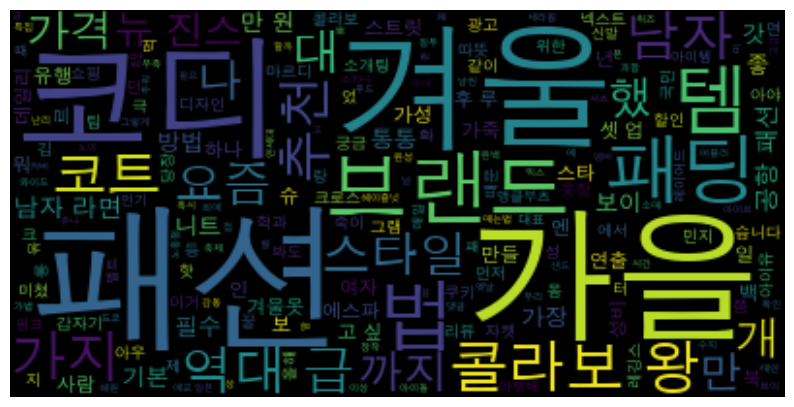

In [16]:
# 5. ÏãúÍ∞ÅÌôî
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf').generate(' '.join(all_tokens))

# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Ïù∏Í∏∞ÎèÑÍ∞Ä ÎÜíÏùÄ ÏòÅÏÉÅÎì§Ïùò Ï†úÎ™©Îì§ÏùÑ Î∂ÑÏÑùÌïú Í≤∞Í≥º Îã§ÏùåÍ≥º Í∞ôÏùÄ Îã®Ïñ¥Îì§Ïù¥ ÏûêÏ£º Îì±Ïû•ÌïúÎã§.

In [18]:
# Îã§ÏùåÏùÄ ÏòÅÏÉÅÏùò ÏãúÍ∞ÑÎåÄÏóê Îî∞ÎùºÏÑú Ïù∏Í∏∞ÎèÑÏùò Î≥ÄÌôîÎ•º ÏïåÏïÑÎ≥¥Ïûê
df.columns

Index(['video_id', 'title', 'time', 'views', 'likes', 'dislikes',
       'comments_cnt', 'comments', 'query', 'likes_normalized',
       'comments_cnt_normalized', 'popularity'],
      dtype='object')